<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

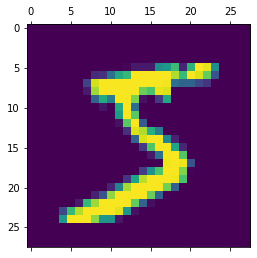

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2715 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9839


In [17]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23084), started 0:17:20 ago. (Use '!kill 23084' to kill it.)

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [21]:
model.get_weights()

[array([[ 0.04093296,  0.08112629, -0.05800796, ...,  0.00068333,
          0.03807832, -0.01852727],
        [ 0.07089302,  0.05698514,  0.06921424, ...,  0.00185055,
         -0.06340343,  0.02551061],
        [-0.04960891, -0.0430057 , -0.07523778, ..., -0.02827839,
          0.01250189, -0.03469837],
        ...,
        [ 0.06473893,  0.01415075,  0.03962359, ...,  0.0699849 ,
          0.00998345,  0.03489289],
        [ 0.07778566, -0.01007942,  0.06582518, ..., -0.01105617,
          0.07968578, -0.00635236],
        [ 0.05972199, -0.06683303, -0.01127657, ..., -0.03569844,
         -0.0116123 ,  0.02944983]], dtype=float32),
 array([ 0.06655598, -0.11703632, -0.04661404,  0.23278607,  0.05069802,
         0.09457715, -0.10133705, -0.07137947,  0.10265487, -0.00281313,
        -0.01143664, -0.18732983,  0.13583161, -0.137785  , -0.11593928,
         0.06217435, -0.13492018, -0.03396139, -0.02394515, -0.04111102,
        -0.07212213, -0.05831832, -0.11087389, -0.11551158,  0.030